### Exponentially-Weighted Moving Average (EWMA)
- Also known as exponential smoothing / and a kind of low-pass filter
- Very applicable in machine learning, statistics, finance, signal processing

### If ArthMean : $ñ$
$EWMA: x₂ = αx₁ + (1 −α)ñ0 ,\ where 0 ≤ α ≤1$

~ xhat = df [ `GOOG' ].ewm (alpha) retuens ewm object ~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd. read_csv('international-airline-passengers.csv', index_col='Month', parse_dates=True)
df.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.isna().sum()

passengers    0
dtype: int64

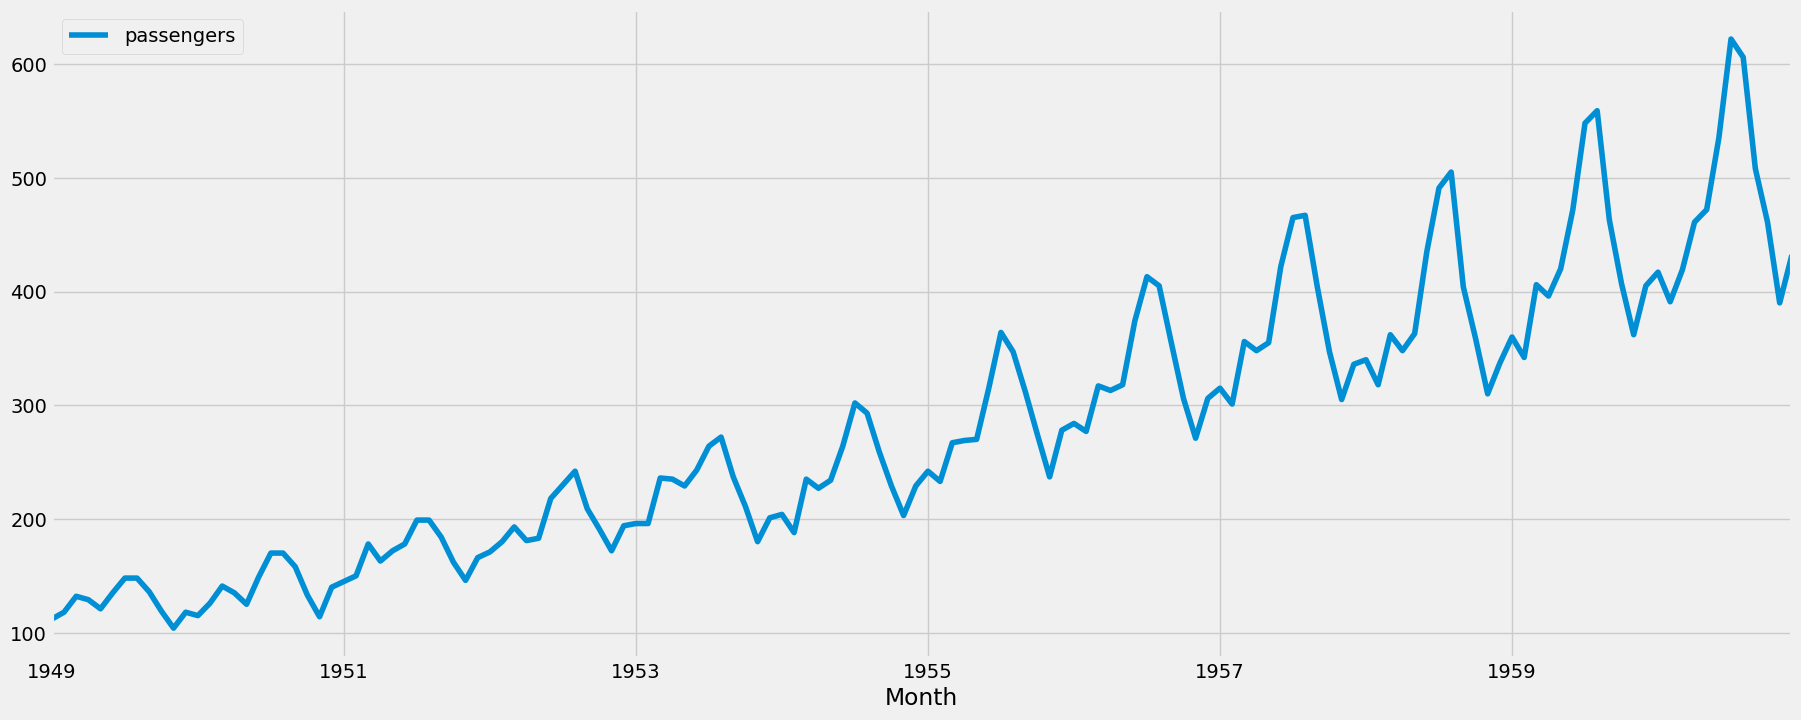

In [4]:
df.plot(
    style='-',
    figsize=(20,8)
)
#parten seen 
plt.show()

In [5]:
alpha = 0.2
df['EWMA'] = df['passengers'].ewm(alpha=alpha, adjust=False).mean()
# adjust = False NO internal calc

<Axes: xlabel='Month'>

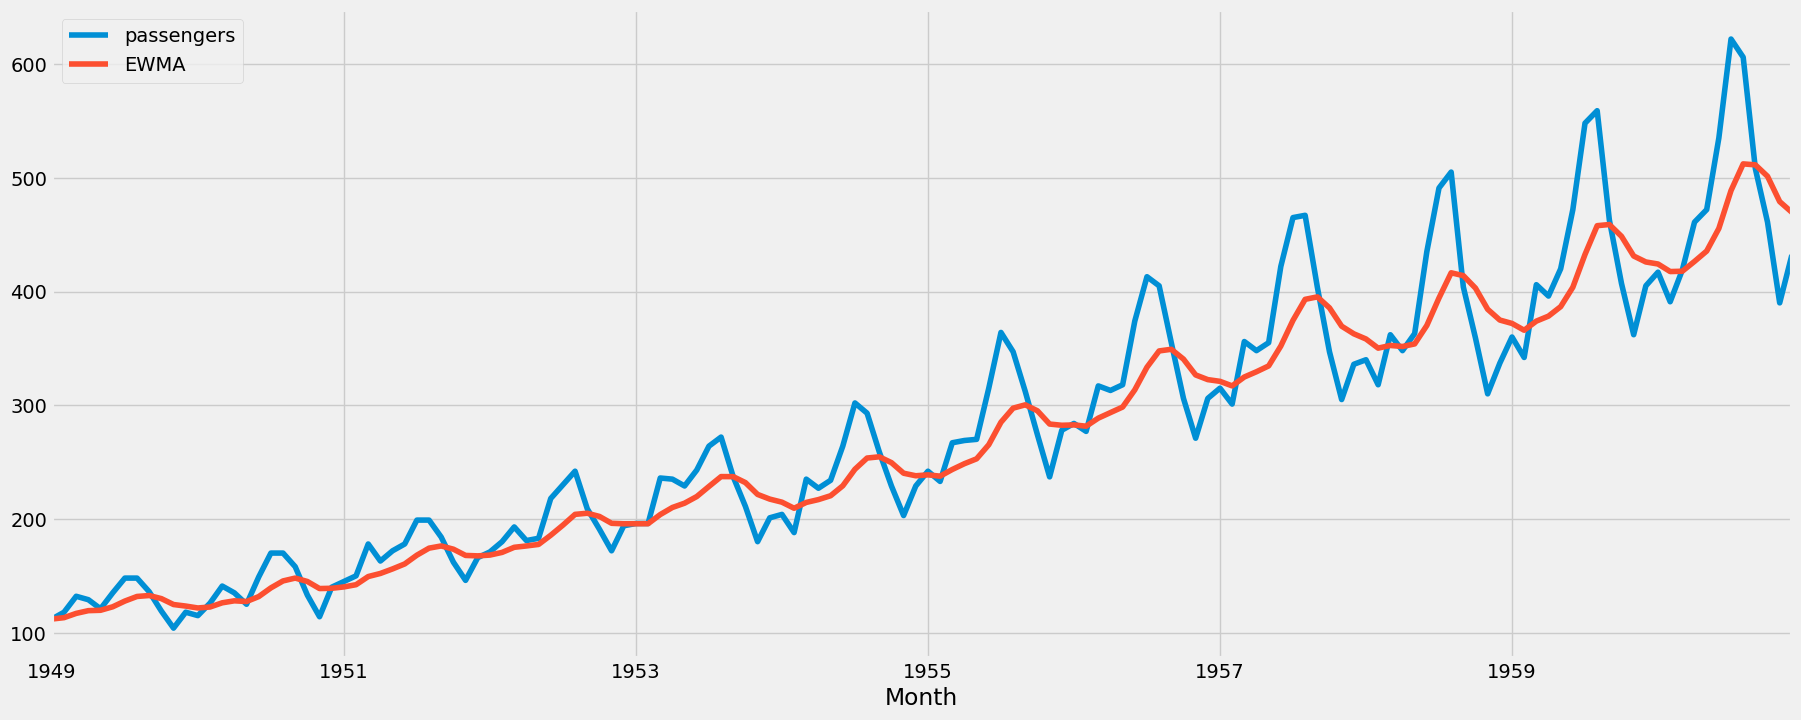

In [6]:
type(df['passengers'].ewm(alpha=alpha, adjust=False))
df.plot(
    style='-',
    figsize=(20,8)
)

In [7]:
manual_ewma = []
for x in df ['passengers'].to_numpy ( ) :
    if len (manual_ewma) > 0:
        xhat= alpha * x + (1- alpha) * manual_ewma[-1]
    else:
        xhat = x
    manual_ewma.append(xhat)
df[ 'manual' ] = manual_ewma

In [8]:
df

,passengers,EWMA,manual
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,113.200000,113.200000
1949-03-01,132,116.960000,116.960000
1949-04-01,129,119.368000,119.368000
1949-05-01,121,119.694400,119.694400
...,...,...,...
1960-08-01,606,512.214093,512.214093
1960-09-01,508,511.371274,511.371274
1960-10-01,461,501.297019,501.297019


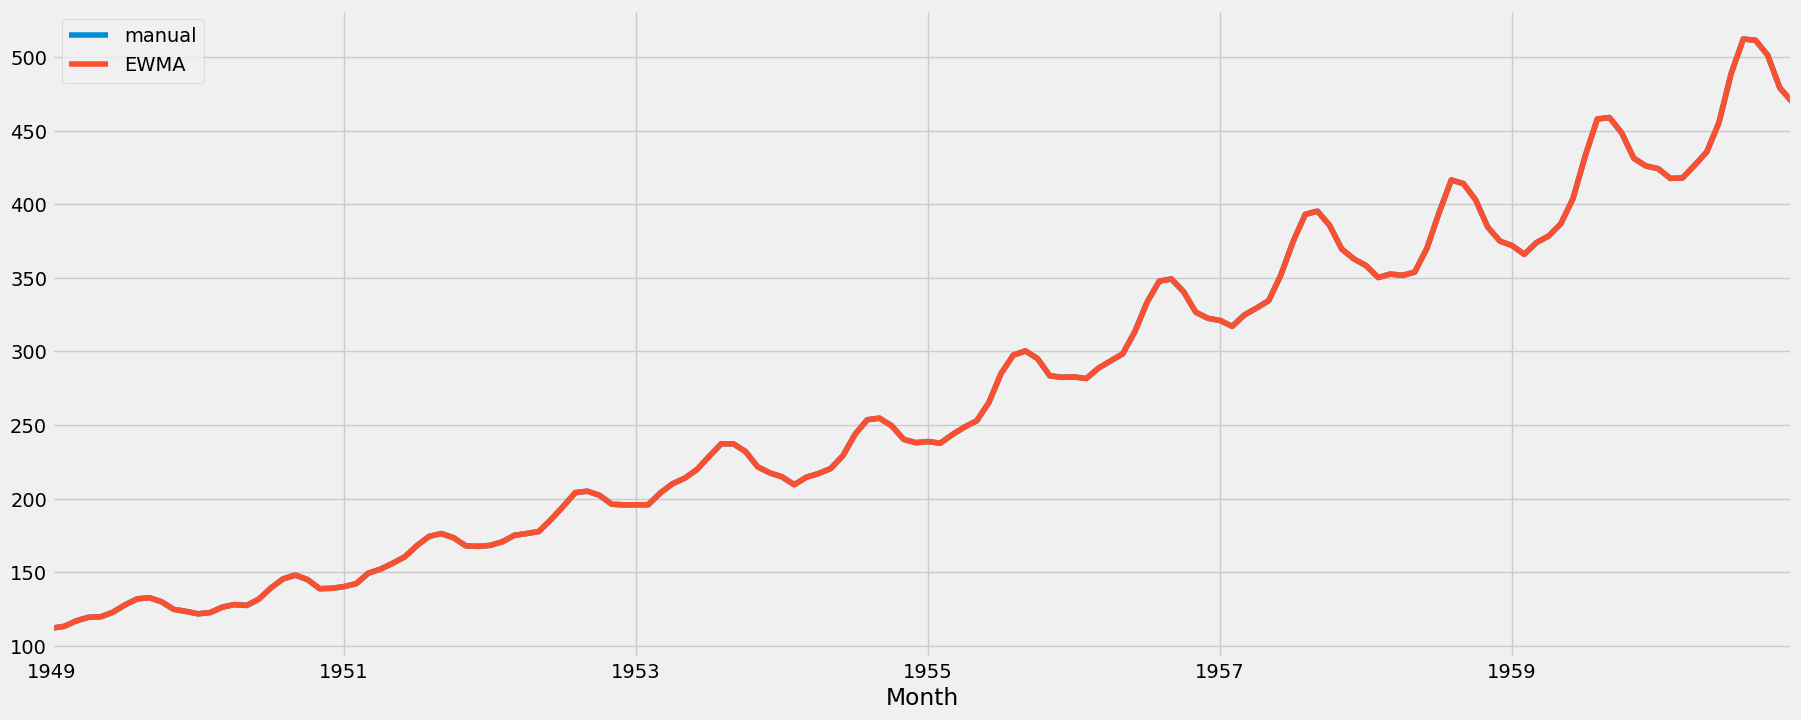

In [9]:
temp = df[['manual','EWMA']].plot(
    figsize=(20,8),
)

In [10]:
df.drop('manual',axis=1,inplace=True)

### Simple Exponential Smoothing (Forcasting)

$Forecast Equation : ŷt+h|t = lt, h = 1,2,3...$ 


$Smoothing Equation, lt = ay₁ + (1 − a)lt–1$ \
l is level

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#make the model - data is univariate 1D array because it expects time
ses = SimpleExpSmoothing(data)
# Sklearn -> fit take data , constructor takes hyper parms (here reverse)
# 'fit' the model returns a HoltWinters Results object
result = ses. fit (smoothing_level=alpha, optimized=False)


NameError: name 'data' is not defined

In [ ]:
#in-sample prediction or out-of-sample forecast
result.predict (start=start_date, end=end_date)

In [ ]:
# Simpler way to predict
# get all in-sample predictions
result. fittedvalues
#forecast n steps ahead
result. forecast(n)

In [12]:
ses = SimpleExpSmoothing(df['passengers'])

c:\Users\Haadif\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [14]:
df.index.freq= 'MS' # MS means Months

In [15]:
ses = SimpleExpSmoothing(
    df.passengers,
    initialization_method='legacy-heuristic'
)

In [16]:
res = ses.fit(smoothing_level=alpha, optimized=False)

In [17]:
res

In [18]:
res.predict(start=df.index[0], end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [19]:
df [ 'SES'] = res.predict(start=df.index[0], end=df.index[-1])

In [20]:
np.allclose(df [ 'SES'], res.fittedvalues)

True

<Axes: xlabel='Month'>

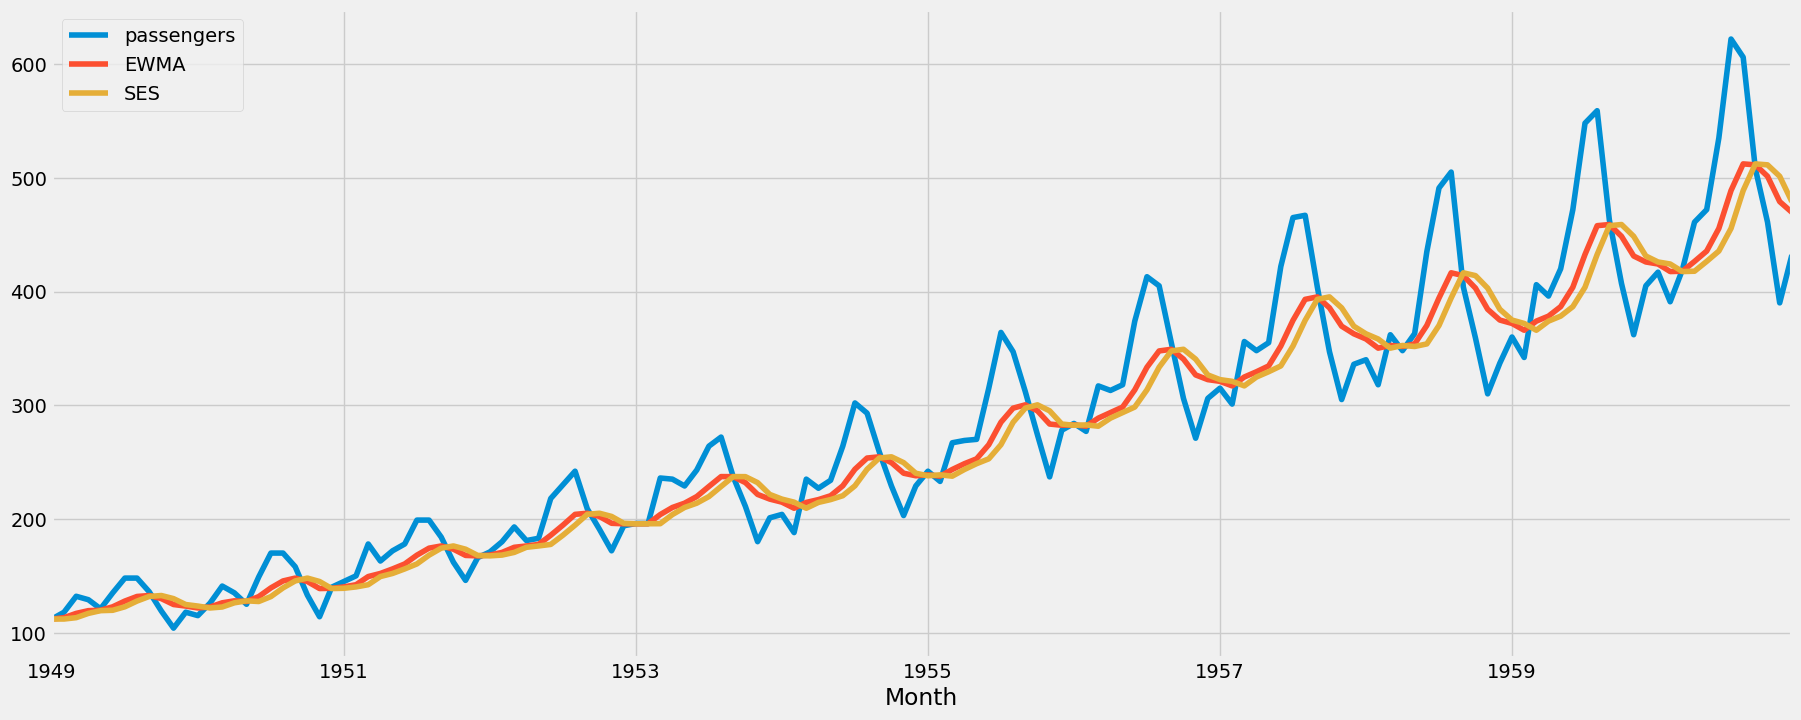

In [21]:
df.plot(
    figsize=(20,8),
    style='-'
)

In [22]:
df

,passengers,EWMA,SES
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,113.200000,112.000000
1949-03-01,132,116.960000,113.200000
1949-04-01,129,119.368000,116.960000
1949-05-01,121,119.694400,119.368000
...,...,...,...
1960-08-01,606,512.214093,488.767616
1960-09-01,508,511.371274,512.214093
1960-10-01,461,501.297019,511.371274


In [23]:
df ['SES-1'] = df['SES'].shift (-1)

<Axes: xlabel='Month'>

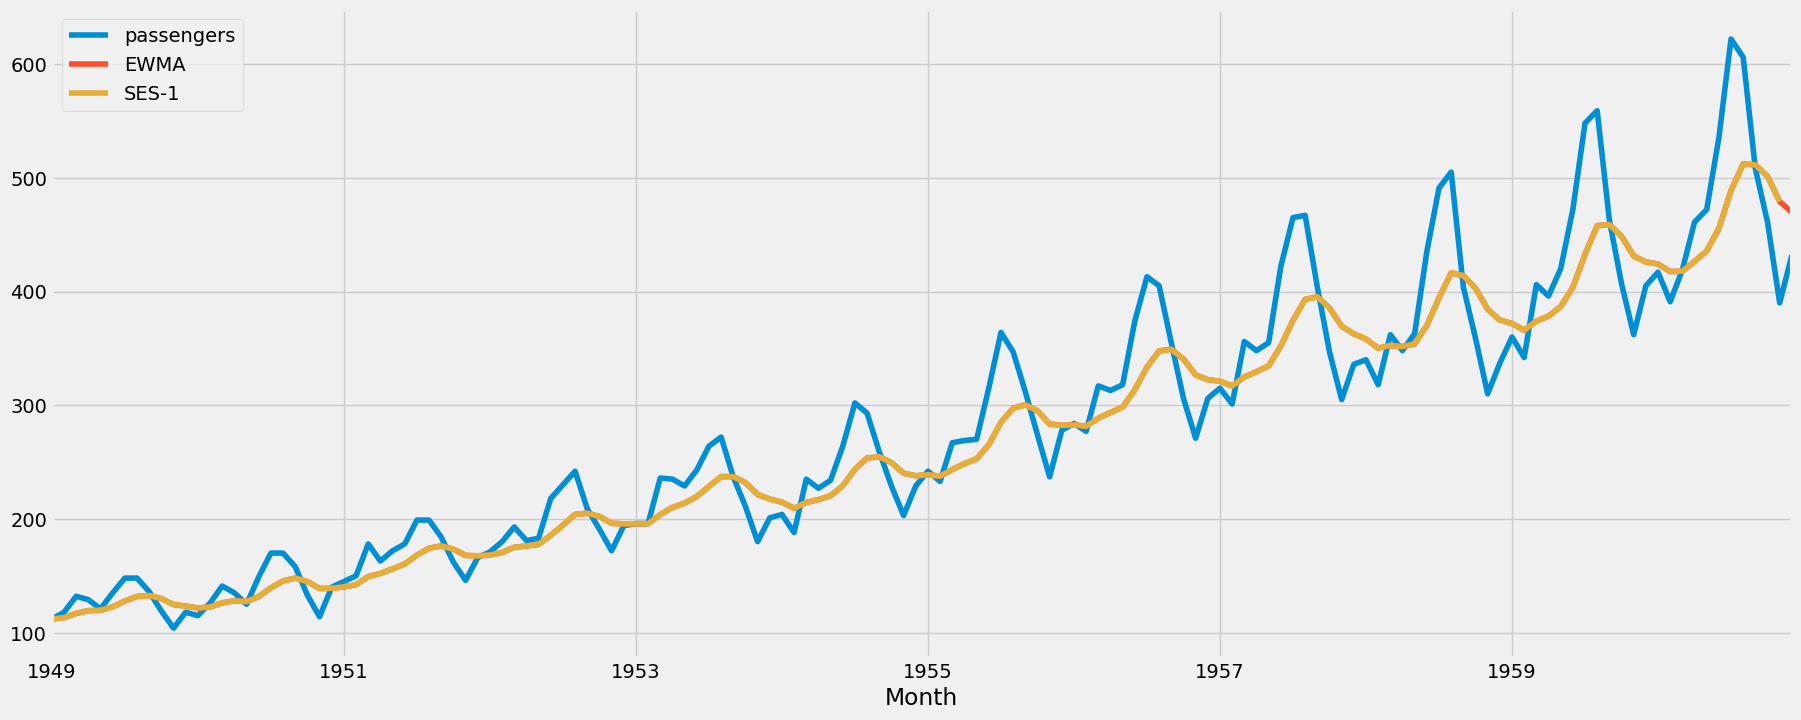

In [24]:
### No!
df [[ 'passengers', 'EWMA', 'SES-1']].plot(
    figsize=(20,8),
    style='-'
)

In [25]:
N_test = 12 
train = df.iloc[:-N_test]
test= df.iloc[-N_test:]

In [26]:
ses = SimpleExpSmoothing (
train[ 'passengers'],
initialization_method='legacy-heuristic')
res = ses.fit()

In [27]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx= df.index > train.index [-1]

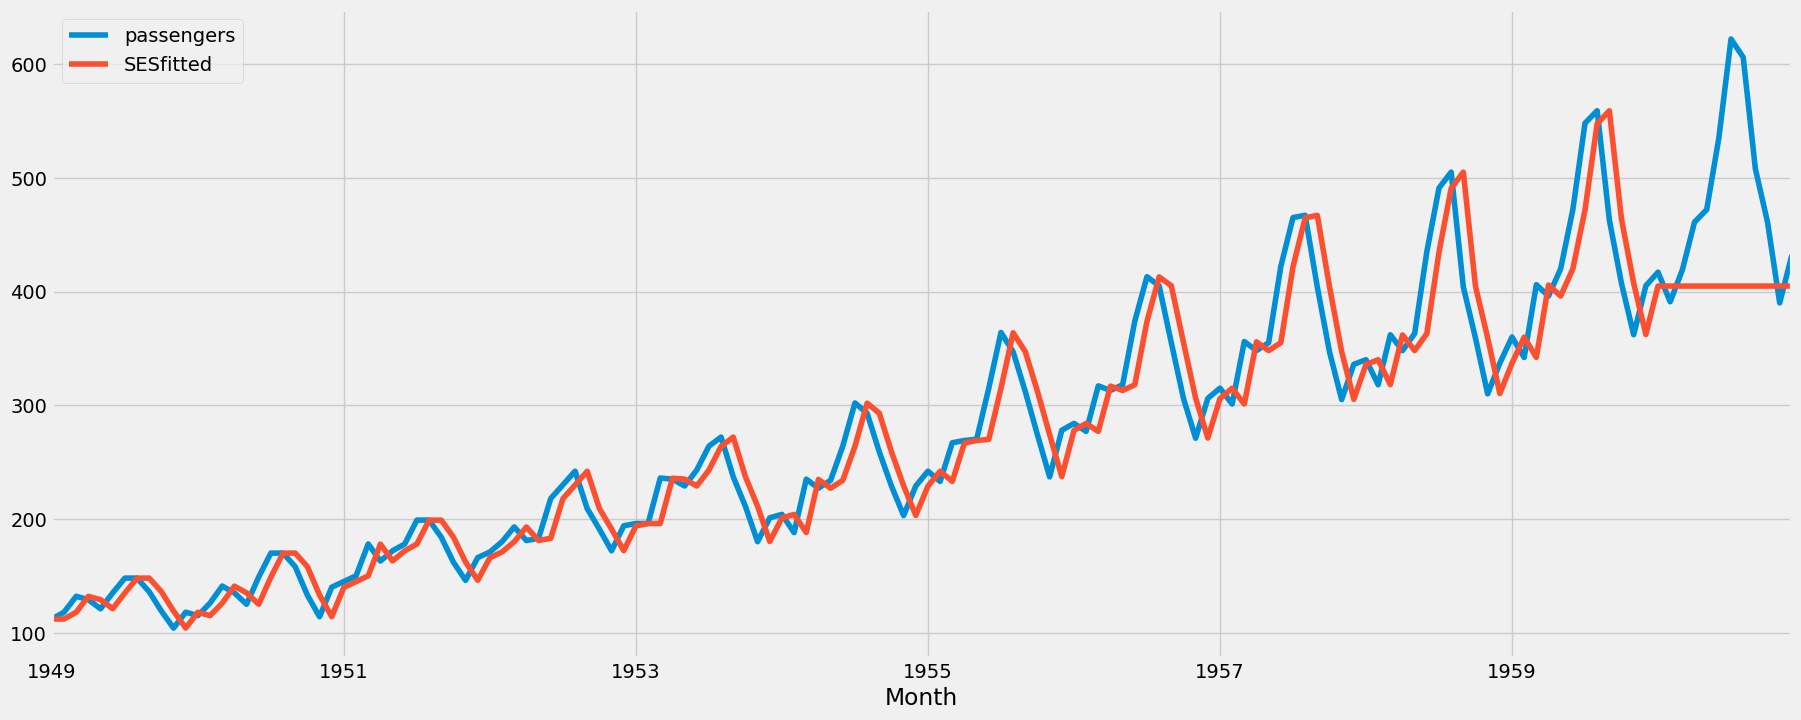

In [28]:
df.loc [train_idx, 'SESfitted'] = res.fittedvalues
df.loc [test_idx, 'SESfitted'] = res.forecast (N_test)
df [[ 'passengers', 'SESfitted']].plot(
    figsize=(20,8),
    style='-'
)
plt.show()

In [29]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Holt's Linear Trend Model
- With simple exponential smoothing, our forecast was always a straight, horizontal line
- Holt's Linear Trend Model allows for trends (lines at any angle) Y(t) = slope*t + y0

In [30]:
from statsmodels.tsa.holtwinters import Holt

In [31]:
holt = Holt(
    df['passengers'],
    initialization_method='legacy-heuristic'
)

In [32]:
res_h = holt.fit()
df['Holt'] = res_h.fittedvalues

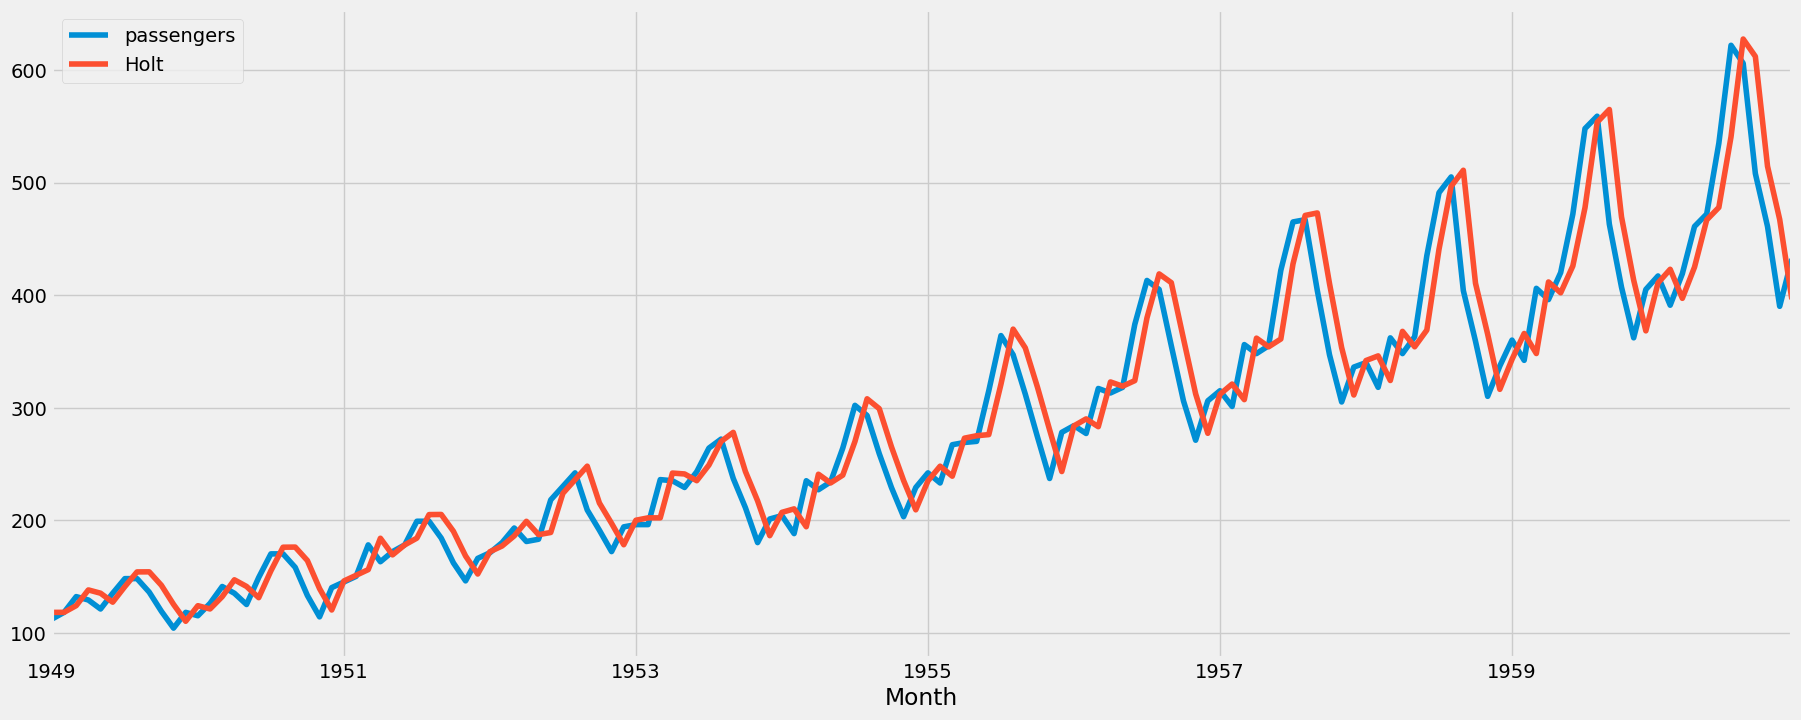

In [33]:
df [['passengers', 'Holt']].plot(
    figsize=(20,8)
)
plt.show()

<Axes: xlabel='Month'>

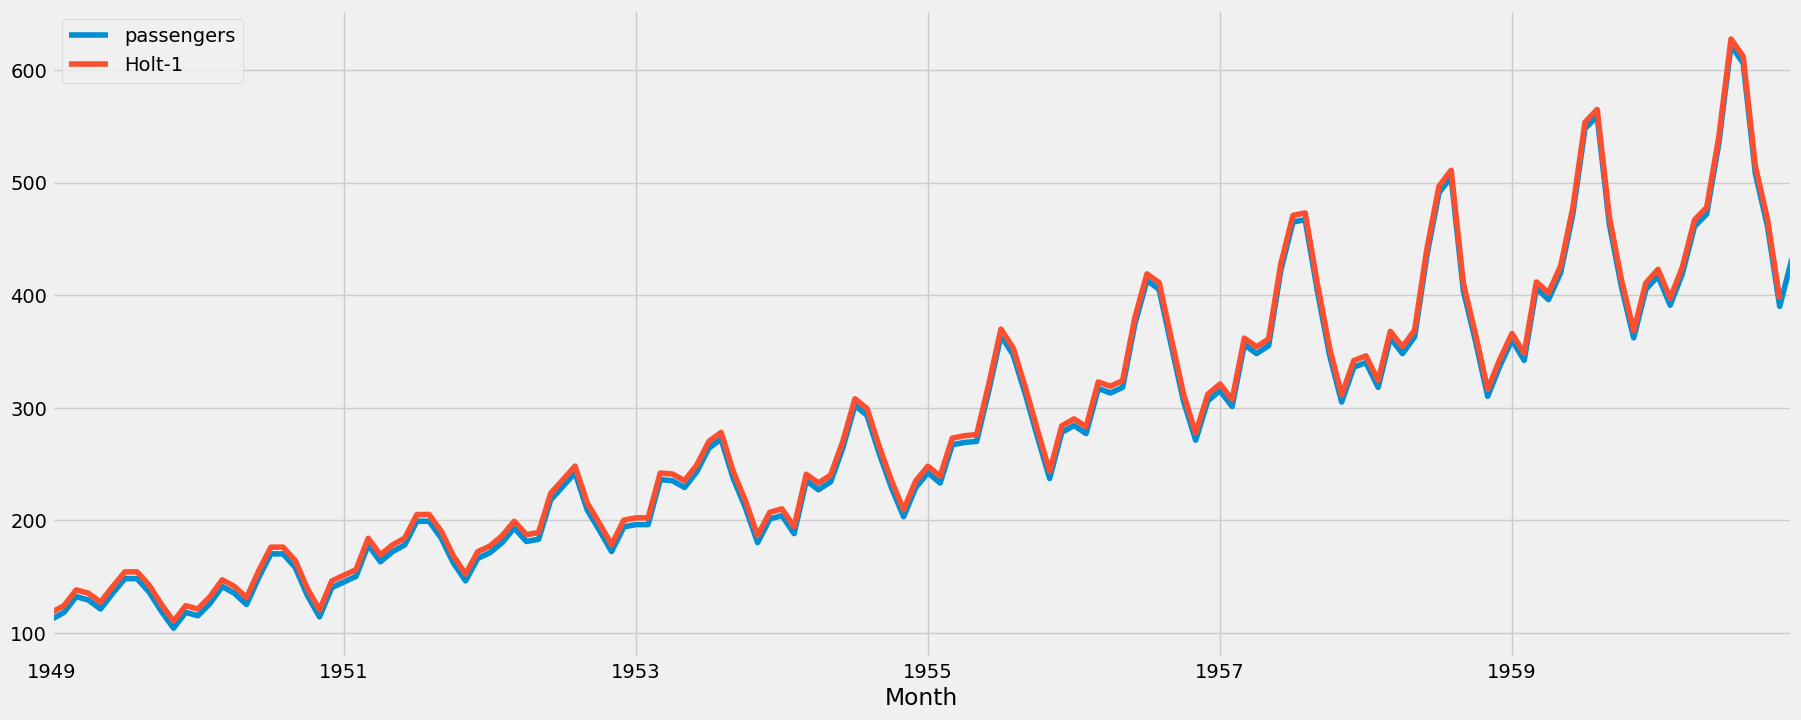

In [34]:
### No!
df ['Holt-1'] = df [ 'Holt'].shift(-1)
df [['passengers', 'Holt-1']].plot(
     figsize=(20,8)
)

In [35]:
holt = Holt(train['passengers'], initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

In [36]:
df.loc[test_idx, 'Holt'] = res_h. forecast (N_test)

<Axes: xlabel='Month'>

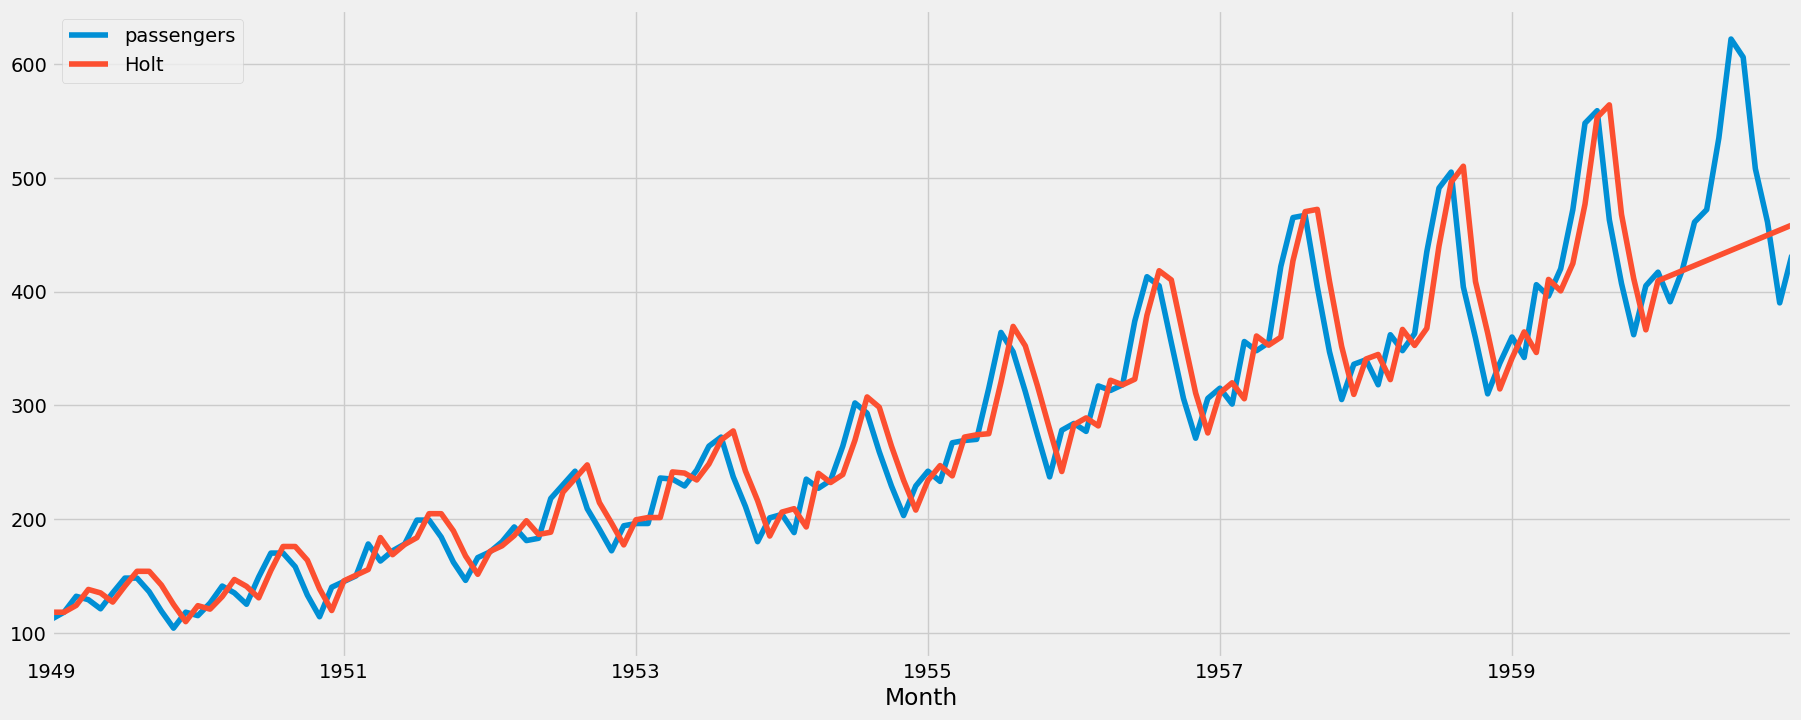

In [37]:
df[['passengers','Holt']].plot(
     figsize=(20,8),
     style='-'
)

### Holt-Winter Model